In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_theme(style="white")
sns.set_theme(style="whitegrid", color_codes=True)

In [4]:
data = pd.read_csv('weatherAUS.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(56420, 24)
['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow']


In [5]:
data.head
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day


In [6]:
data.drop(['RISK_MM'], axis=1, inplace=True)
data.drop('Date', axis=1, inplace = True)

DATA EXPLORATION

In [7]:
data['RainTomorrow'].value_counts()

RainTomorrow
No     43993
Yes    12427
Name: count, dtype: int64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_8936\1813740134.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RainTomorrow',data=data, palette='hls')


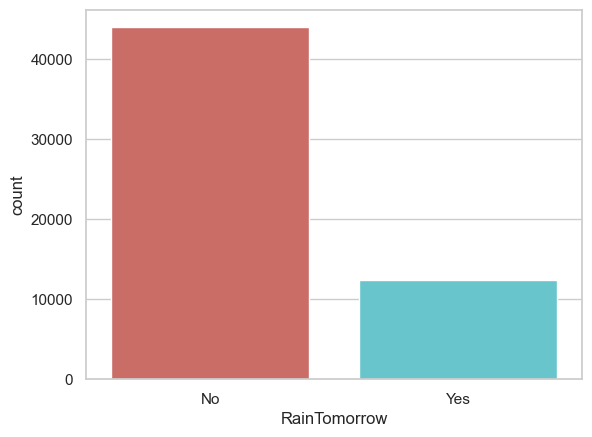

<Figure size 640x480 with 0 Axes>

In [8]:
sns.countplot(x='RainTomorrow',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

Text(0, 0.5, 'Rain Tomorrow or not')

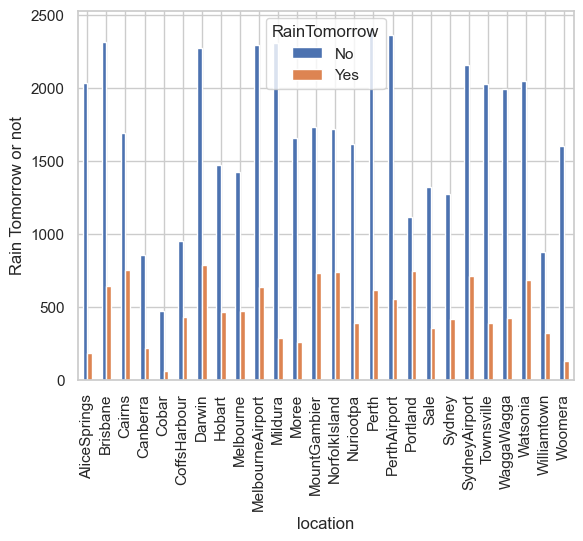

In [9]:
%matplotlib inline
pd.crosstab(data.Location,data.RainTomorrow).plot(kind='bar')
plt.xlabel('location')
plt.ylabel('Rain Tomorrow or not')

Text(0, 0.5, 'WindSpeed3pm')

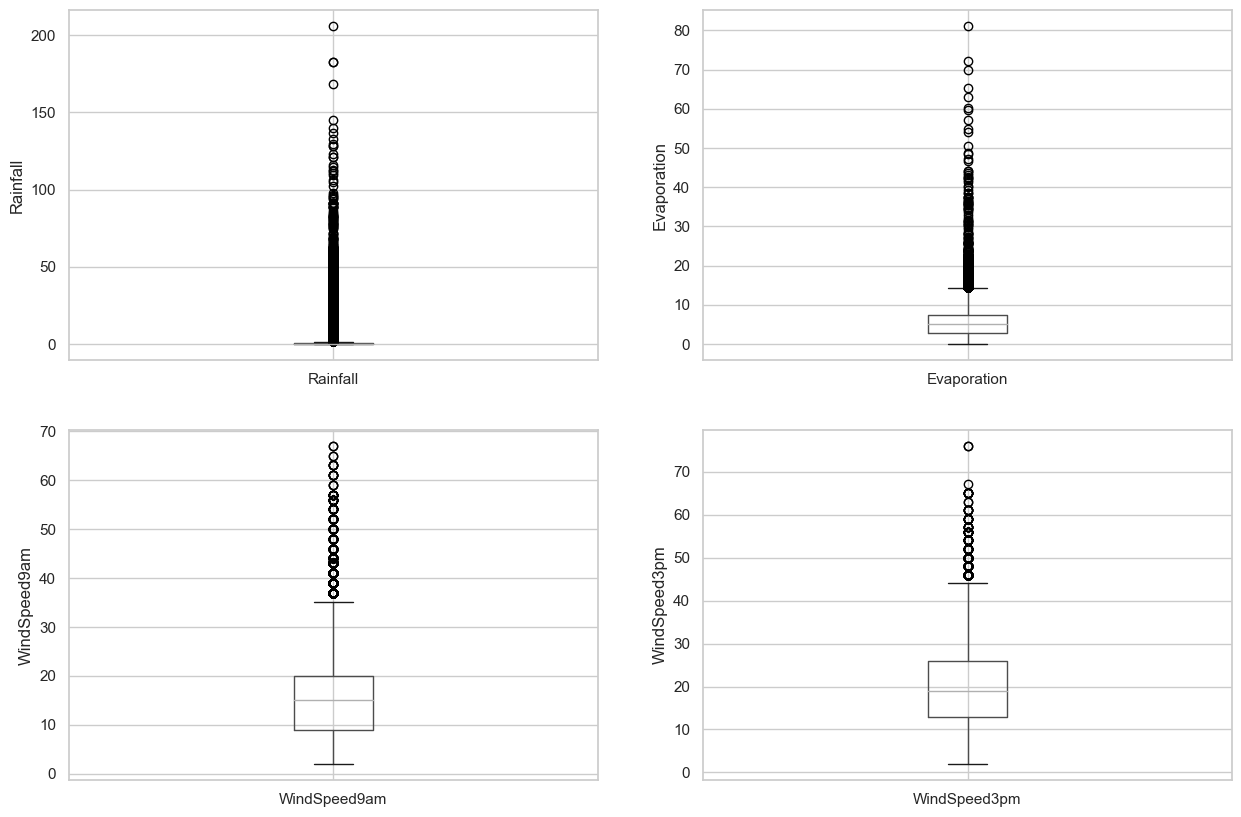

In [10]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = data.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

plt.subplot(2, 2, 3)
fig = data.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = data.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

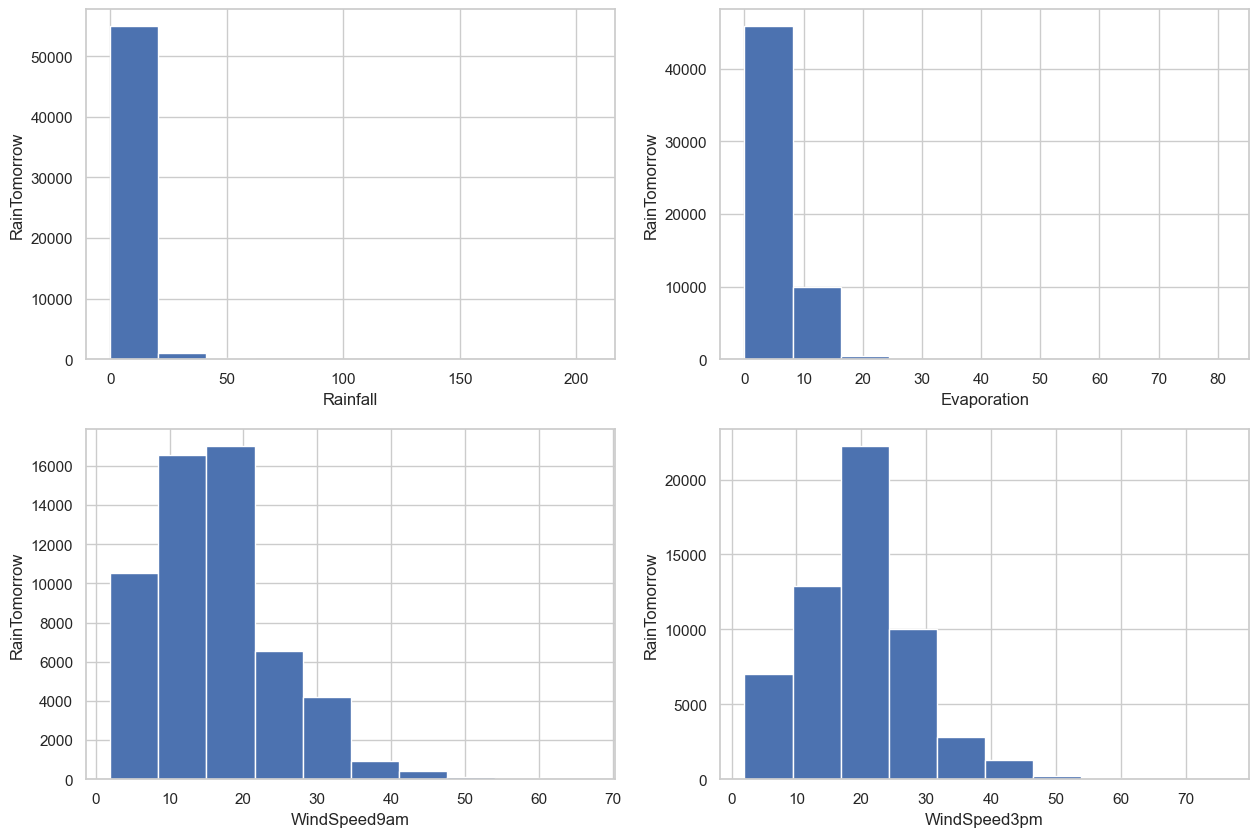

In [11]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = data.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 3)
fig = data.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = data.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [12]:
IQR = data.Rainfall.quantile(0.75) - data.Rainfall.quantile(0.25)
Lower_fence = data.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = data.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -1.7999999999999998 or > 2.4


In [13]:

IQR = data.Evaporation.quantile(0.75) - data.Evaporation.quantile(0.25)
Lower_fence = data.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = data.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.0 or > 21.200000000000003


In [14]:
IQR = data.WindSpeed9am.quantile(0.75) - data.WindSpeed9am.quantile(0.25)
Lower_fence = data.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = data.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -24.0 or > 53.0


In [15]:
IQR = data.WindSpeed3pm.quantile(0.75) - data.WindSpeed3pm.quantile(0.25)
Lower_fence = data.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = data.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -26.0 or > 65.0


CREATE DUMMY VARIABLES


In [16]:
cat_vars = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(cat_vars)))

print('The categorical variables are :', cat_vars)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [17]:
data_encoded = data.copy()

for var in cat_vars:
    dummies = pd.get_dummies(data_encoded[var], prefix=var)
    data_encoded.drop(columns=[var], inplace=True)
    data_encoded = pd.concat([data_encoded, dummies], axis=1)

print(data_encoded.head())



      MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed   
5939     17.9     35.2       0.0         12.0      12.3           48.0  \
5940     18.4     28.9       0.0         14.8      13.0           37.0   
5942     19.4     37.6       0.0         10.8      10.6           46.0   
5943     21.9     38.4       0.0         11.4      12.2           31.0   
5944     24.2     41.0       0.0         11.2       8.4           35.0   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...   
5939           6.0          20.0         20.0         13.0  ...  \
5940          19.0          19.0         30.0          8.0  ...   
5942          30.0          15.0         42.0         22.0  ...   
5943           6.0           6.0         37.0         22.0  ...   
5944          17.0          13.0         19.0         15.0  ...   

      WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W   
5939           False           False           True         False  \
5940          

In [18]:
print(data_encoded.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day', 'Location_AliceSprings',
       'Location_Brisbane', 'Location_Cairns', 'Location_Canberra',
       'Location_Cobar', 'Location_CoffsHarbour', 'Location_Darwin',
       'Location_Hobart', 'Location_Melbourne', 'Location_MelbourneAirport',
       'Location_Mildura', 'Location_Moree', 'Location_MountGambier',
       'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_Perth',
       'Location_PerthAirport', 'Location_Portland', 'Location_Sale',
       'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville',
       'Location_WaggaWagga', 'Location_Watsonia', 'Location_Williamtown',
       'Location_Woomera', 'WindGustDir_E', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindG

In [19]:
X = data_encoded.drop(['RainTomorrow_Yes','RainTomorrow_No'], axis=1)

y = data['RainTomorrow']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape



((45136, 95), (11284, 95))

In [21]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numericalnumerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day',
 'Location_AliceSprings',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Darwin',
 'Location_Hobart',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Sale',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_WaggaWagga',
 'Location_Watsonia',
 'Location_Williamtown',
 'Location_Woomera',
 'WindGustDir_E',
 'WindGustDir_ENE',
 'WindGustDir_ESE',
 'WindGustDir_N',
 'WindGustDir_NE',
 'WindGustDir_NNE',
 'WindGustDir_NNW',
 'WindGustDir_

In [22]:
X_test[numerical].isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
                 ..
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
RainToday_No      0
RainToday_Yes     0
Length: 95, dtype: int64

MODEL TRAINING


In [23]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [24]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [25]:
# probability of getting output as 0 - no rain
logreg.predict_proba(X_test)[:,0]

array([0.98668872, 0.71786101, 0.63663255, ..., 0.97987285, 0.84335639,
       0.68247128])

In [26]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.01331128, 0.28213899, 0.36336745, ..., 0.02012715, 0.15664361,
       0.31752872])

In [27]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8635
